<a href="https://colab.research.google.com/github/Yashmitha22/ML_projects/blob/main/austismprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler

import warnings
warnings.filterwarnings('ignore')

In [6]:
 df = pd.read_csv('data1.csv')
 print(df.head())

   ID  A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0   1         1         1         0         0         1         1         0   
1   2         1         0         0         0         0         0         0   
2   3         1         1         1         0         1         1         0   
3   4         0         0         0         0         0         0         0   
4   5         0         0         0         1         0         0         0   

   A8_Score  A9_Score  ...        age  gender       ethnicity jaundice austim  \
0         0         1  ...  15.599481       m  White-European      yes     no   
1         1         0  ...  27.181099       m           Asian       no     no   
2         1         1  ...  31.643906       m  White-European      yes     no   
3         0         0  ...  25.369210       m               ?       no     no   
4         0         0  ...   9.078580       m               ?       no     no   

  contry_of_res used_app_before     re

In [7]:
df.shape

(200, 21)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               200 non-null    int64  
 1   A1_Score         200 non-null    int64  
 2   A2_Score         200 non-null    int64  
 3   A3_Score         200 non-null    int64  
 4   A4_Score         200 non-null    int64  
 5   A5_Score         200 non-null    int64  
 6   A6_Score         200 non-null    int64  
 7   A7_Score         200 non-null    int64  
 8   A8_Score         200 non-null    int64  
 9   A9_Score         200 non-null    int64  
 10  A10_Score        200 non-null    int64  
 11  age              200 non-null    float64
 12  gender           200 non-null    object 
 13  ethnicity        200 non-null    object 
 14  jaundice         200 non-null    object 
 15  austim           200 non-null    object 
 16  contry_of_res    200 non-null    object 
 17  used_app_before 

In [9]:
df.describe()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.575000,0.555000,0.475000,0.425000,0.450000,0.340000,0.420000,0.54500,0.540000,0.640000,26.074568,8.671369
std,57.879185,0.495584,0.498213,0.500628,0.495584,0.498742,0.474898,0.494797,0.49922,0.499648,0.481205,14.517024,4.709994
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,4.781474,-5.655613
25%,50.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,16.152524,5.611695
50%,100.500000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,1.000000,1.000000,22.717970,9.804165
75%,150.250000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,32.004413,12.487160
max,200.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,77.110749,15.731361


In [10]:
df['ethnicity'].value_counts()


,count
ethnicity,
White-European,66
?,54
Middle Eastern,27
Asian,17
South Asian,9
Pasifika,8
Others,7
Latino,4
Turkish,3


In [11]:
df['relation'].value_counts()


,count
relation,
Self,180
Parent,8
?,6
Relative,2
Others,2
Health care professional,2


In [12]:
df = df.replace({'yes':1, 'no':0, '?':'Others', 'others':'Others'})


In [17]:
ints = []
objects = []
floats = []

for col in df.columns:
  if df[col].dtype == int:
    ints.append(col)
  elif df[col].dtype == object:
    objects.append(col)
  else:
    floats.append(col)


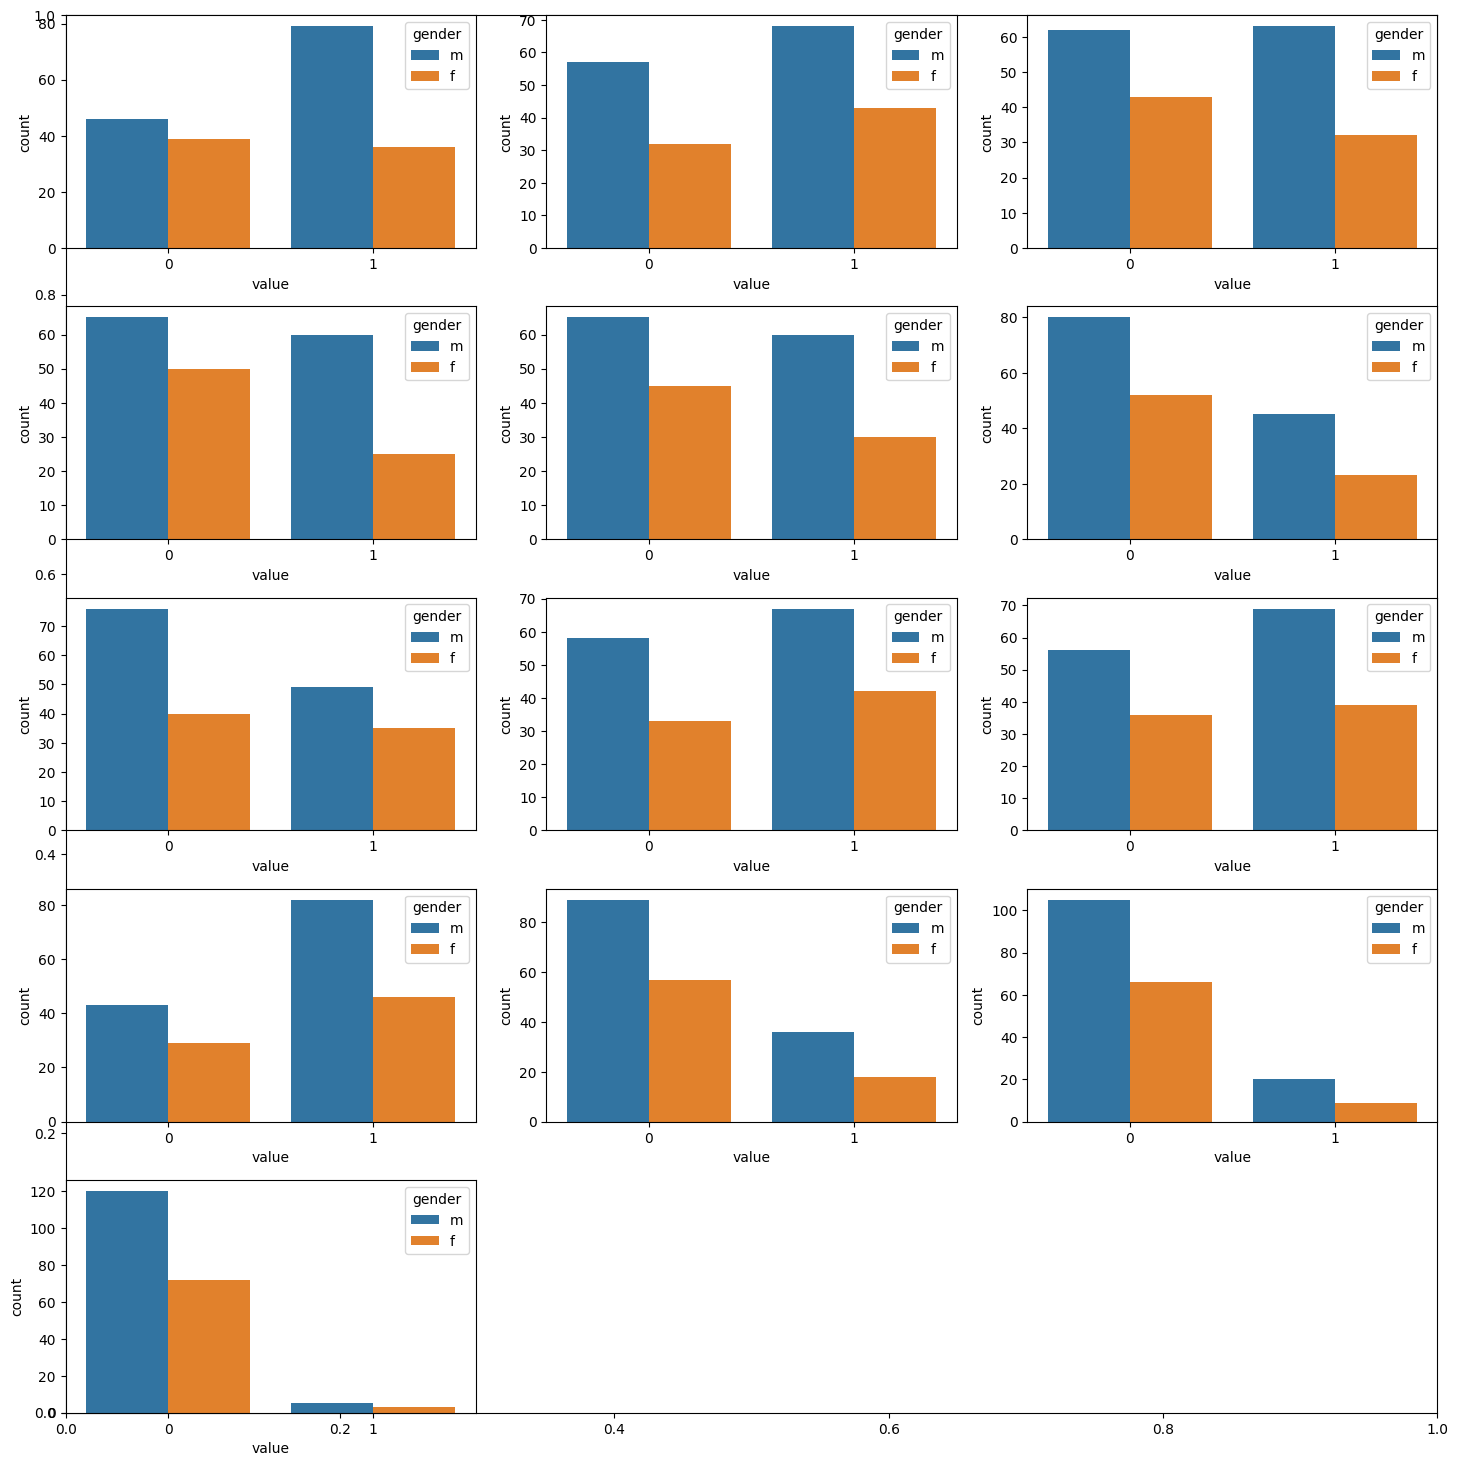

In [24]:
df_melted = df.melt(id_vars=['ID', 'gender'], value_vars=ints, var_name='col', value_name='value')

plt.subplots(figsize=(15,15))

for i, col in enumerate(ints):
  plt.subplot(5,3,i+1)
  sb.countplot(x='value', hue='gender', data=df_melted[df_melted['col'] == col])

plt.tight_layout()
plt.show()



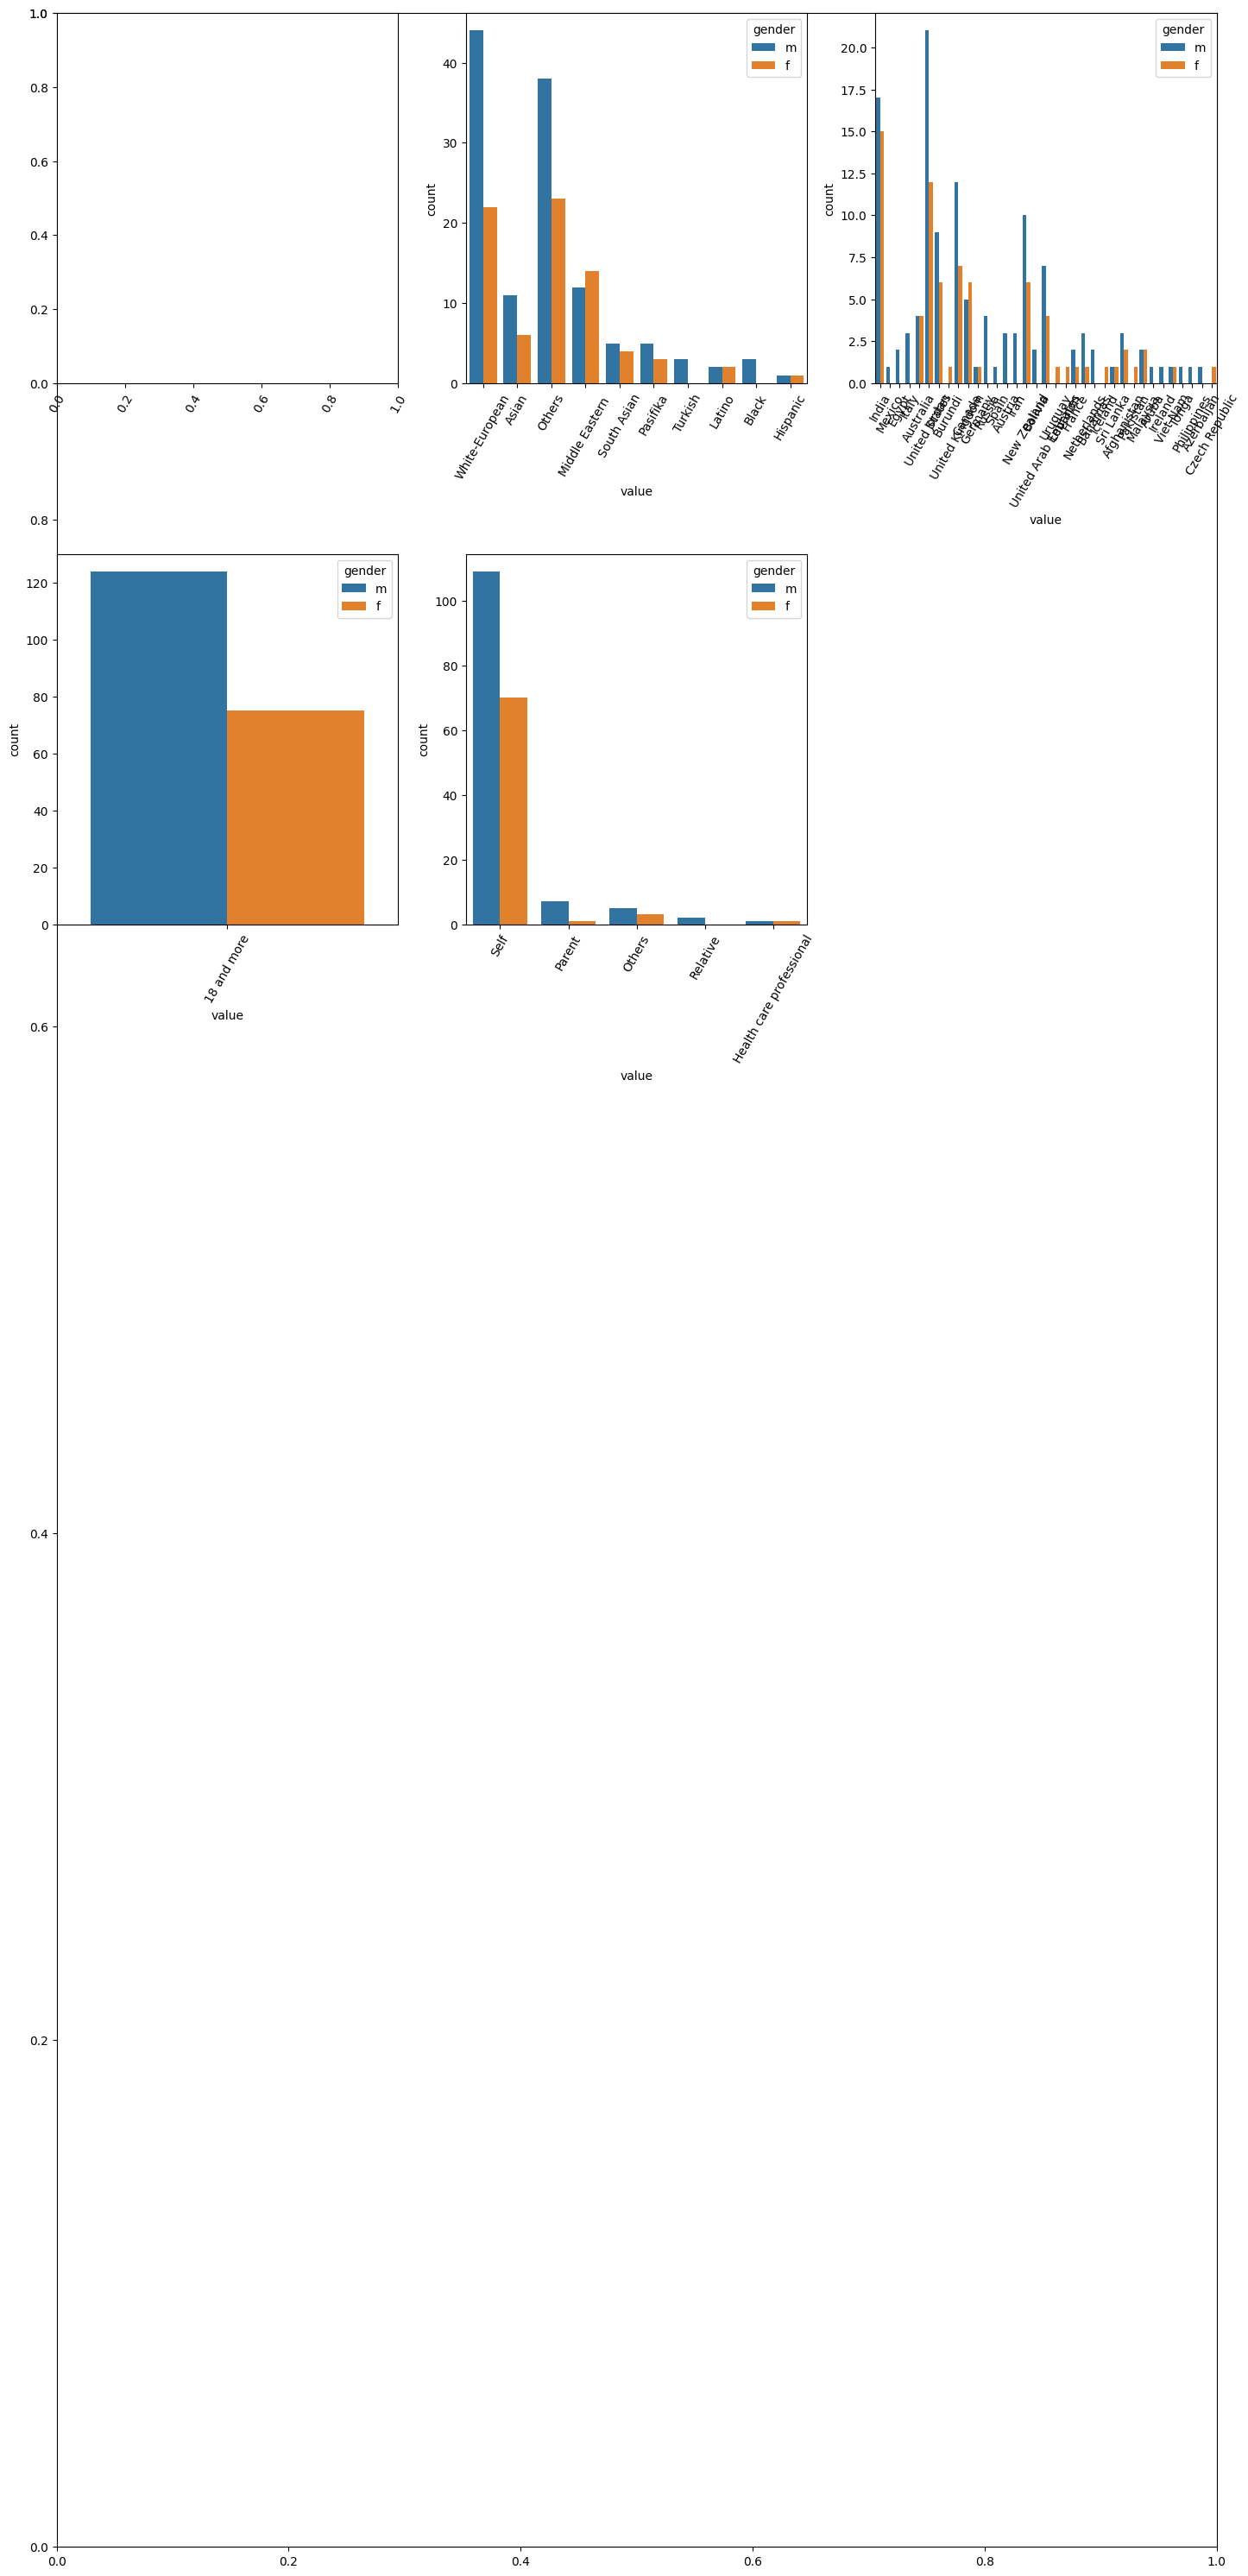

In [38]:
plt.subplots(figsize=(15, 30))

for i, col in enumerate(objects):
    plt.subplot(5, 3, i+1)
    df_melted = df.melt(id_vars=['gender'], value_vars=[col], var_name='col', value_name='value')


    sb.countplot(x='value', hue='gender', data=df_melted)
    plt.xticks(rotation=60)

plt.tight_layout()
plt.show()



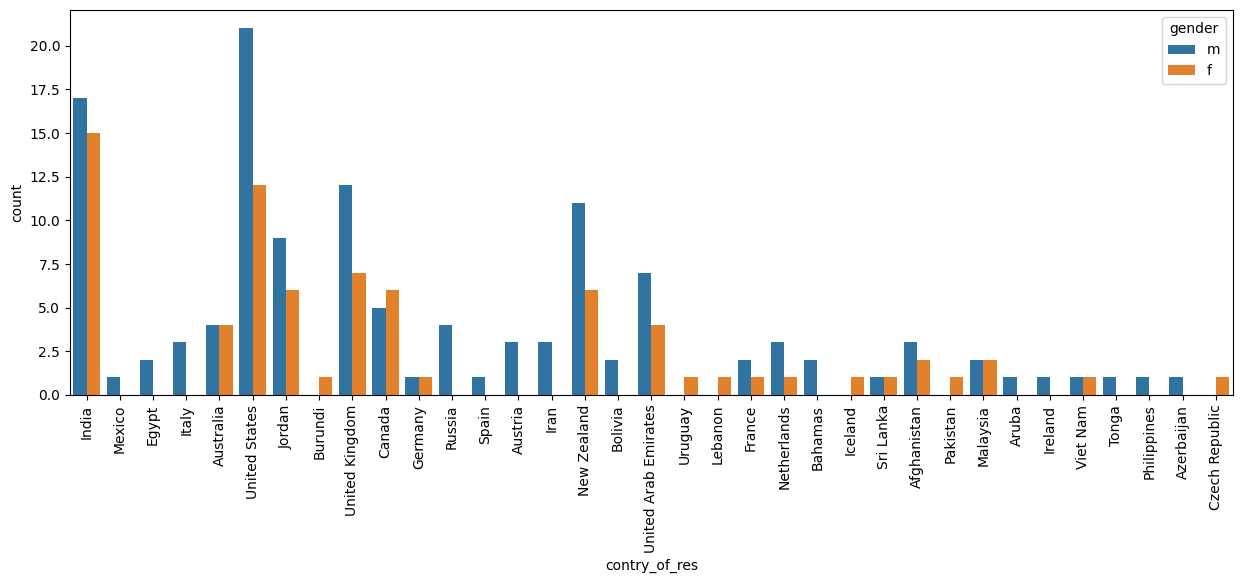

In [28]:
plt.figure(figsize=(15,5))
sb.countplot(data=df, x='contry_of_res', hue='gender')
plt.xticks(rotation=90)
plt.show()


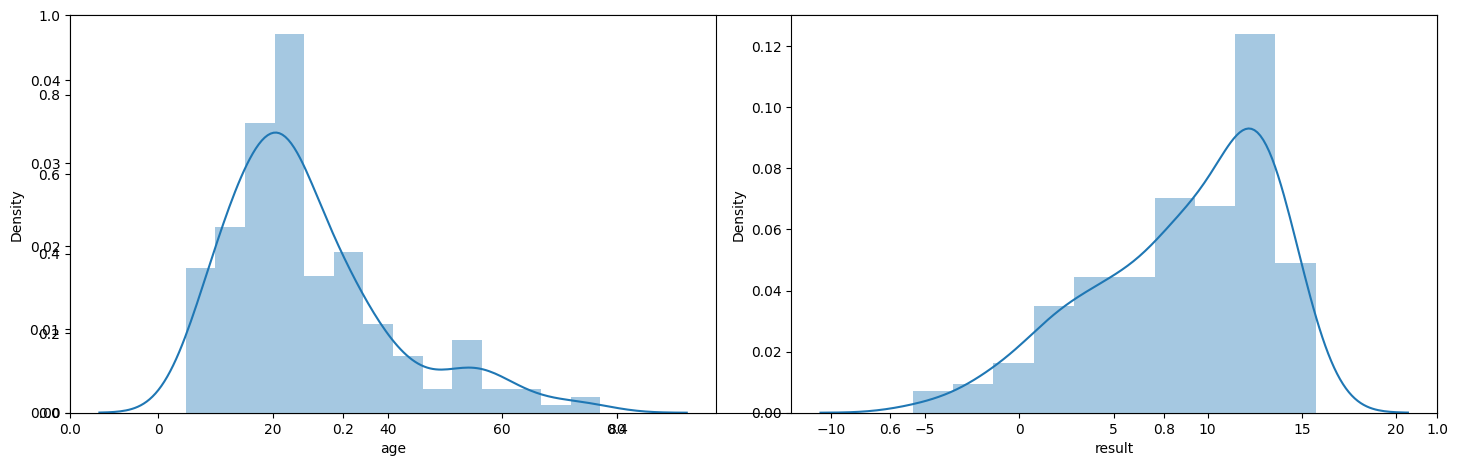

In [29]:
plt.subplots(figsize=(15,5))

for i, col in enumerate(floats):
  plt.subplot(1,2,i+1)
  sb.distplot(df[col])
plt.tight_layout()
plt.show()


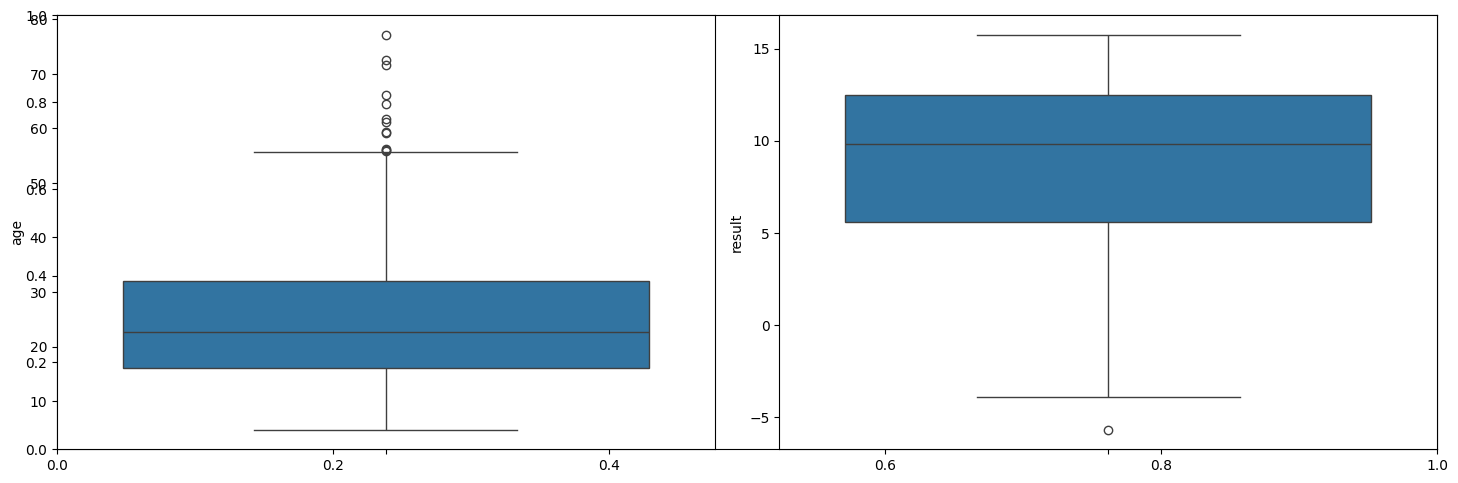

In [30]:
plt.subplots(figsize=(15,5))

for i, col in enumerate(floats):
  plt.subplot(1,2,i+1)
  sb.boxplot(df[col])
plt.tight_layout()
plt.show()


In [31]:
df = df[df['result']>-5]
df.shape


(199, 21)

In [32]:
def convertAge(age):
    if age < 4:
        return 'Toddler'
    elif age < 12:
        return 'Kid'
    elif age < 18:
        return 'Teenager'
    elif age < 40:
        return 'Young'
    else:
        return 'Senior'

df['ageGroup'] = df['age'].apply(convertAge)


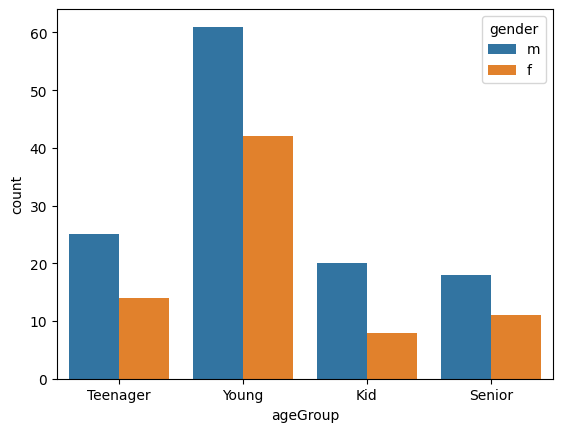

In [33]:
sb.countplot(x=df['ageGroup'], hue=df['gender'])
plt.show()


In [34]:
def add_feature(data):

  data['sum_score'] = 0
  for col in data.loc[:,'A1_Score':'A10_Score'].columns:

    data['sum_score'] += data[col]

  data['ind'] = data['austim'] + data['used_app_before'] + data['jaundice']

  return data

df = add_feature(df)


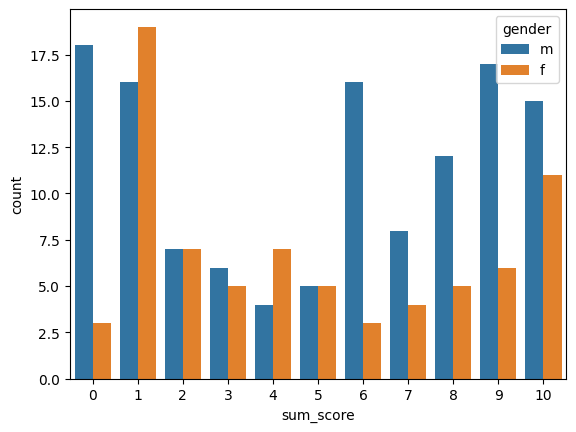

In [35]:
sb.countplot(x=df['sum_score'], hue=df['gender'])
plt.show()


In [36]:
df['age'] = df['age'].apply(lambda x: np.log(x))


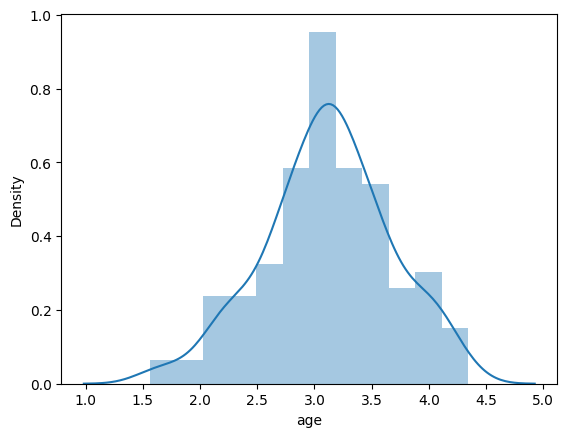

In [37]:
sb.distplot(df['age'])
plt.show()
